In [156]:
!ls

ALL_CITATIONS.txt	      addons
AMIGOS-invasion_uncoupled.o   beta
BioFVM			      cell_ECM_interactions.o
BioFVM_MultiCellDS.o	      changes.md
BioFVM_agent_container.o      config
BioFVM_basic_agent.o	      core
BioFVM_matlab.o		      custom_modules
BioFVM_mesh.o		      debug.log
BioFVM_microenvironment.o     documentation-deprecated
BioFVM_solvers.o	      examples
BioFVM_utilities.o	      extracellular_matrix.o
BioFVM_vector.o		      inference.pkl
CITATION.txt		      inference2.pkl
ECM_physicell_explanation.md  inference3.pkl
Makefile		      inference4.pkl
Makefile-backup		      inference5.pkl
PhysiCell_MultiCellDS.o       leader_follower
PhysiCell_SVG.o		      licenses
PhysiCell_basic_signaling.o   main.cpp
PhysiCell_cell.o	      matlab
PhysiCell_cell_container.o    modules
PhysiCell_constants.o	      output
PhysiCell_custom.o	      povray
PhysiCell_geometry.o	      project
PhysiCell_pathology.o	      protocols
PhysiCell_phenotype.o	      pugixml.o
PhysiCell_pugixml.o	      sample_pr

In [14]:
import os
os.chdir("PhysiCell")

In [4]:
import multiprocessing

cores = multiprocessing.cpu_count() # Count the number of cores in a computer
cores

8

In [157]:
! ./project

Using config file ./config/PhysiCell_settings.xml ... 
Disabling automated spring adhesions and detachments!
1
dc? 1
User parameters in XML config file: 
Bool parameters:: 
normalize_ECM_influenced_motility_vector: 0 [dimensionless]
freeze_uE_profile: 0 [dimensionless]
enable_ecm_outputs: 1 [dimensionless]

Int parameters:: 
discrete_ECM_remodeling: 1 [dimensionless]
link_anisotropy_and_bias: 0 [dimensionless]
unit_test_setup: 0 [dimensionless]
march_unit_test_setup: 0 [dimensionless]

Double parameters:: 
initial_anisotropy: 0 [dimensionless]
initial_ECM_density: 0.5 [dimensionless]
chemotactic_substrate_decay_rate: 0.1 [1/minutes]
angle_of_chemical_field_gradient: 45 [dimensionless]
ECM_dx: 20 [um]
ECM_dy: 20 [um]
ECM_dz: 20 [um]
duration_of_uE_conditioning: 10 [minutes]

String parameters:: 
cell_setup: lesion [dimensionless]
chemical_field_setup: none [dimensionless]
ECM_orientation_setup: random [dimensionless]
cell_motility_ECM_interaction_model_selector: follower chemotaxis/no f

In [158]:
import xml.etree.ElementTree as ET

def modify_xml_value(file_path, tag_path, new_value):
    tree = ET.parse(file_path)
    root = tree.getroot()
    element = root
    for tag in tag_path:
        element = element.find(tag)
        if element is None:
            print(f"Balise '{tag}' non trouvée dans le chemin spécifié.")
            return False
    element.text = str(new_value)
    tree.write(file_path, encoding="utf-8", xml_declaration=True)
    return True

In [357]:
tag_path = ["overall", "max_time"]
new_value = 1000
modify_xml_value("config/PhysiCell_settings.xml", tag_path, new_value)
print("Fichier XML modifié avec succès.")

Fichier XML modifié avec succès.


In [362]:
# Exemple d'appel de la fonction pour modifier l'intervalle dans <SVG>
tag_path = ["save", "SVG", "interval"]
new_value = 200
modify_xml_value("config/PhysiCell_settings.xml", tag_path, new_value)
tag_path = ["save", "full_data", "interval"]
modify_xml_value("config/PhysiCell_settings.xml", tag_path, new_value)
print("Fichier XML modifié avec succès.")

Fichier XML modifié avec succès.


In [20]:
tag_path = ["cell_definitions", "cell_definition[@name='follower cell']", "phenotype","mechanics", "cell_cell_repulsion_strength"]
new_value = 90
modify_xml_value("config/PhysiCell_settings.xml", tag_path, new_value)
print("Fichier XML modifié avec succès.")

Fichier XML modifié avec succès.


In [370]:
tag_path = ["parallel", "omp_num_threads"]
new_value = 5
modify_xml_value("config/PhysiCell_settings.xml", tag_path, new_value)
print("Fichier XML modifié avec succès.")

Fichier XML modifié avec succès.


In [371]:
import time
import subprocess

start_time = time.time()

subprocess.run(["./project"] , stdout=subprocess.DEVNULL)

end_time = time.time()

execution_time = end_time - start_time

print(execution_time)

6.557570219039917


In [368]:
import time
import subprocess
min_time = 1000
min_i = 0
for i in range(8):
    times = 0
    for j in range(4):
        tag_path = ["parallel", "omp_num_threads"]
        new_value = i+1
        modify_xml_value("config/PhysiCell_settings.xml", tag_path, new_value)
        print("Fichier XML modifié avec succès.")
        start_time = time.time()

        subprocess.run(["./project"] , stdout=subprocess.DEVNULL)

        end_time = time.time()

        execution_time = end_time - start_time
        times += execution_time
    
    if times/4 < min_time:
        min_time = execution_time
        min_i = i+1
print(min_time, min_i)

Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XM

In [159]:
import xml.etree.ElementTree as ET

def get_agent_count(svg_file_path):
    # Parse the SVG file
    tree = ET.parse(svg_file_path)
    root = tree.getroot()
    
    # Define the namespace
    namespaces = {'svg': 'http://www.w3.org/2000/svg'}
    
    # Find all text elements
    text_elements = root.findall('.//svg:text', namespaces)
    
    # Iterate through text elements to find the one containing the agent count
    for elem in text_elements:
        if 'agents' in elem.text:
            # Extract the number of agents from the text
            agent_count = int(''.join(filter(str.isdigit, elem.text)))
            return agent_count
    
    # If no agent count was found, return None or raise an exception
    return None

agent_count1 = get_agent_count('/home/aymeric/tumor-simulation/PhysiCell/output/final.svg')
print(agent_count1)

218


In [1]:
import scipy.io
from math import sqrt
import subprocess

def get_rayon_equiv(path_mat):
    mat = scipy.io.loadmat(path_mat)
    X = mat['cells'][1]  # Correction d'indexation
    Y = mat['cells'][2]  # Correction d'indexation

    X += 400
    Y += 400

    # Calculer le barycentre (centre moyen) des petits cercles
    X_center = np.mean(X)
    Y_center = np.mean(Y)

    # Calculer les distances des centres des petits cercles au barycentre
    distances = np.sqrt((X - X_center)**2 + (Y - Y_center)**2)

    # Estimer le rayon équivalent comme la moyenne des distances au barycentre
    rayon_equiv = np.mean(distances)
    
    return rayon_equiv

In [ ]:
#RETESTER RAYON EQUIVALENT
#Revoir simulation_wrapper pour les params

In [354]:
def simulation_wrapper(params):
    num_timepoints = 6
    results_per_timepoint = 2

    if len(params.shape) == 1:
        n = 1
    else:
        n = params.shape[0]
    results = torch.zeros(n, num_timepoints,results_per_timepoint)
    
    for i in range(n):
        if n == 1:
            param1 = params[0]
            param2 = params[1]
        else:
            param1 = params[i, 0]
            param2 = params[i, 1]
        modify_xml_value("config/PhysiCell_settings.xml", ["cell_definitions", "cell_definition[@name='follower cell']", "phenotype","mechanics", "cell_cell_repulsion_strength"], param1.item())
        modify_xml_value("config/PhysiCell_settings.xml", ["cell_definitions", "cell_definition[@name='follower cell']", "phenotype","mechanics", "cell_cell_adhesion_strength"], param2.item())
        

        subprocess.run(["./project"] , stdout=subprocess.DEVNULL)


        for t in range(num_timepoints):
            svg_filename = './output/snapshot{0:08d}.svg'.format(t)
            mat_filename = './output/output{0:08d}_cells.mat'.format(t)

            agent_count = get_agent_count(svg_filename)
            rayon_equiv = get_rayon_equiv(mat_filename)

            # Assigner les résultats aux lignes appropriées de la matrice des résultats
            results[i, t, :] = torch.tensor([agent_count, rayon_equiv])

    return results.flatten()


In [349]:
simulation_wrapper(torch.tensor([70, 10]))

tensor([214.0000,  66.5600, 224.0000,  72.0787, 231.0000,  72.2968, 240.0000,
         73.4792, 251.0000,  74.2171, 260.0000,  74.3207])

In [163]:
import torch
import pickle
from sbi.inference import SNPE, prepare_for_sbi, simulate_for_sbi
from sbi.utils.get_nn_models import posterior_nn
from sbi import utils as utils
from sbi import analysis as analysis


In [299]:
num_dim = 2
low = torch.tensor([0, 0])

# Définir les bornes supérieures pour chaque dimension
high = torch.tensor([100, 100])

# Créer le prior uniforme avec les bornes spécifiées
prior = utils.BoxUniform(low=low, high=high)

In [300]:
simulator, prior = prepare_for_sbi(simulation_wrapper, prior)

In [301]:
inference = SNPE(prior=prior)

In [302]:
theta, x = simulate_for_sbi(simulator, proposal=prior, num_simulations=1000)

Running 1000 simulations.: 100%|██████████| 1000/1000 [1:28:51<00:00,  5.33s/it]


In [303]:
inference = inference.append_simulations(theta, x)

In [304]:
density_estimator = inference.train()

 Neural network successfully converged after 211 epochs.

In [305]:
with open("/home/aymeric/tumor-simulation/NN/simulated_data1.pkl", "wb") as handle:
    pickle.dump((theta, x), handle)
with open("/home/aymeric/tumor-simulation/NN/density_estimator1.pkl", "wb") as handle:
    pickle.dump(density_estimator, handle)

In [306]:
posterior = inference.build_posterior(density_estimator)

In [253]:
theta = torch.tensor([50, 10])
x_o = simulation_wrapper(theta)
print(x_o)

tensor([214.0000,  66.5600, 218.0000,  71.4479, 220.0000,  71.1099, 225.0000,
         68.8709, 225.0000,  68.2305, 228.0000,  70.4393])


tensor([214.0000,  66.5600, 216.0000,  69.7030, 216.0000,  70.8597, 216.0000,
         69.2195, 216.0000,  68.1852, 216.0000,  69.6063])


Drawing 1000000 posterior samples: 1000068it [00:03, 298544.41it/s]                            


tensor([49.9552, 37.7383])
tensor([214.0000,  66.5600, 216.0000,  68.7255, 216.0000,  68.8982, 216.0000,
         69.7900, 216.0000,  70.7665, 216.0000,  71.7705])
tensor(1.3730)


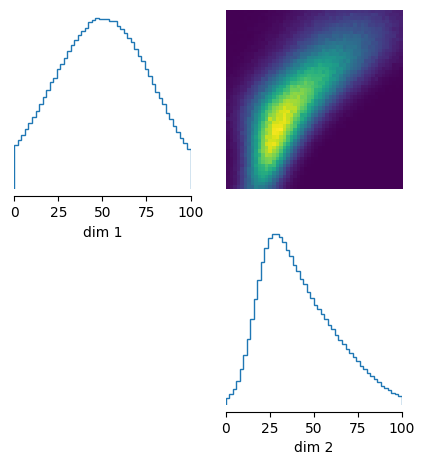

In [323]:
theta = torch.tensor([5, 20])
x_o = simulation_wrapper(theta)
print(x_o)
posterior_samples = posterior.sample((1000000,), x=x_o)

# plot posterior samples
_ = analysis.pairplot(
    posterior_samples, limits=[[0, 100], [0, 100]], figsize=(5, 5)
)
print(posterior_samples.median(dim=0).values)
predicted_tensor = simulation_wrapper(posterior_samples.median(dim=0).values)
print(predicted_tensor)
mse = torch.mean((x_o - predicted_tensor)**2)
print(mse)

Drawing 100000 posterior samples: 100464it [00:00, 282629.69it/s]                           
Drawing 100000 posterior samples: 101999it [00:00, 150717.72it/s]                           
Drawing 100000 posterior samples: 100992it [00:00, 224291.89it/s]                           
Drawing 100000 posterior samples: 101513it [00:00, 207359.27it/s]                           
Drawing 100000 posterior samples: 100817it [00:00, 160123.37it/s]                           
Drawing 100000 posterior samples: 100736it [00:00, 184984.68it/s]                           
Drawing 100000 posterior samples: 101433it [00:00, 134765.90it/s]                           
Drawing 100000 posterior samples: 102063it [00:00, 123553.79it/s]                           
Drawing 100000 posterior samples: 101706it [00:00, 189270.79it/s]                           
Drawing 100000 posterior samples: 100398it [00:00, 207838.82it/s]                           
Drawing 100000 posterior samples: 100486it [00:00, 216572.79it/s]     

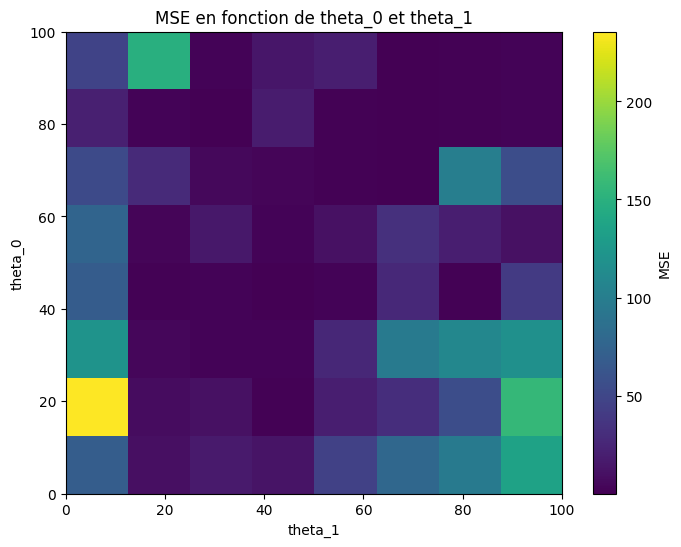

In [315]:
import matplotlib.pyplot as plt
# Définir les plages de valeurs pour theta_0 et theta_1
theta_0_range = torch.linspace(0, 100, 8)
theta_1_range = torch.linspace(0, 100, 8)

mse_values = np.zeros((len(theta_0_range), len(theta_1_range)))

# Calculer le MSE pour chaque combinaison de theta_0 et theta_1
for i, t0 in enumerate(theta_0_range):
    for j, t1 in enumerate(theta_1_range):
        theta = torch.tensor([t0, t1])
        x_o = simulation_wrapper(theta)
        posterior_samples = posterior.sample((100000,), x=x_o)
        predicted_tensor = simulation_wrapper(posterior_samples.median(dim=0).values)
        mse = torch.mean((x_o - predicted_tensor)**2)
        mse_values[i, j] = mse.item()

plt.figure(figsize=(8, 6))
plt.imshow(mse_values, extent=(0, 100, 0, 100), origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label='MSE')
plt.xlabel('theta_1')
plt.ylabel('theta_0')
plt.title('MSE en fonction de theta_0 et theta_1')
plt.show()


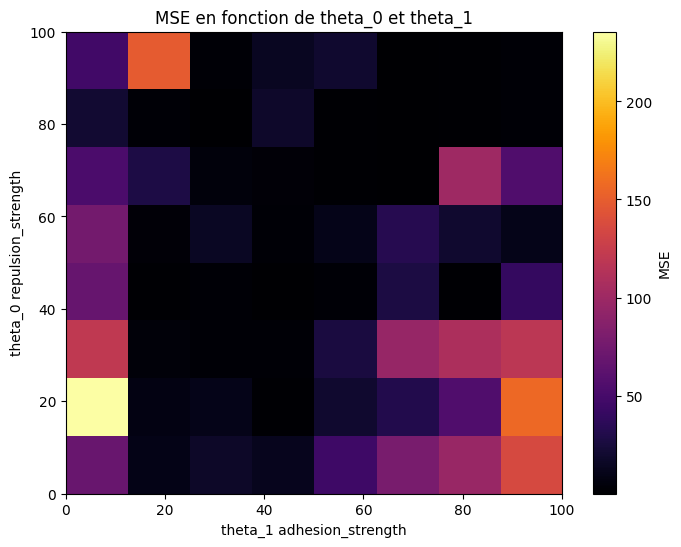

In [321]:
plt.figure(figsize=(8, 6))
plt.imshow(mse_values, extent=(0, 100, 0, 100), origin='lower', aspect='auto', cmap='inferno')
plt.colorbar(label='MSE')
plt.xlabel('theta_1 adhesion_strength')
plt.ylabel('theta_0 repulsion_strength')
plt.title('MSE en fonction de theta_0 et theta_1')
plt.show()

In [347]:
tensors_list = []
theta = torch.tensor([100,100])
for i in range(1):
    x_o = simulation_wrapper(theta)
    tensors_list.append(x_o)

x_o = torch.stack(tensors_list)
x_o = torch.mean(x_o, dim=0)

print(x_o)

tensor([214.0000,  66.5600, 217.0000,  69.8695, 217.0000,  68.4927, 217.0000,
         68.0611, 217.0000,  68.4150, 217.0000,  68.9635])


Drawing 100000 posterior samples: 101267it [00:00, 183600.13it/s]                           


tensor([50.1681, 28.7176])
tensor([214.0000,  66.5600, 216.0000,  67.7817, 216.0000,  67.7201, 216.0000,
         68.7296, 216.0000,  69.4242, 216.0000,  67.9440])
[<Axes: ylabel='theta_0'> <Axes: xlabel='theta_1', ylabel='theta_0'>
 <Axes: xlabel='theta_0', ylabel='theta_1'> <Axes: xlabel='theta_1'>]


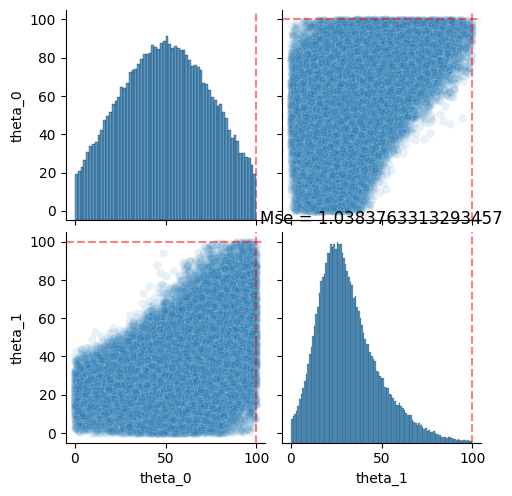

In [348]:
import seaborn as sns
import pandas as pd


# Générer des échantillons du postérieur
posterior_samples = posterior.sample((100000,), x=x_o)
# Calculer le MSE
print(posterior_samples.median(dim=0).values)
predicted_tensor = simulation_wrapper(posterior_samples.median(dim=0).values)
print(predicted_tensor)
mse = torch.mean((x_o - predicted_tensor)**2)


# Convertir les échantillons en numpy array pour Seaborn
posterior_samples_np = posterior_samples.numpy()

# Créer le pairplot avec Seaborn
pairplot = sns.pairplot(
    pd.DataFrame(posterior_samples_np, columns=['theta_0', 'theta_1']),
    plot_kws={'alpha': 0.1}
)
pairplot.fig.set_size_inches(5, 5)
axes = pairplot.axes.flatten()
print(axes)
axes[0].axvline(x=theta[0].item(), color='red', linestyle='--', alpha=0.5)
axes[1].axhline(y=theta[0].item(), color='red', linestyle='--', alpha=0.5)
axes[1].axvline(x=theta[1].item(), color='red', linestyle='--', alpha=0.5)
axes[2].axhline(y=theta[1].item(), color='red', linestyle='--', alpha=0.5)
axes[2].axvline(x=theta[0].item(), color='red', linestyle='--', alpha=0.5)
axes[3].axvline(x=theta[1].item(), color='red', linestyle='--', alpha=0.5)

plt.title("Mse = "+str(mse.item()))
# Afficher le pairplot
plt.show()




In [298]:
theta = torch.tensor([, 9])
x_o = simulation_wrapper(theta)
print(x_o)
theta = torch.tensor([70, 5])
x_o = simulation_wrapper(theta)
print(x_o)

tensor([214.0000,  66.5600, 226.0000,  72.4457, 236.0000,  73.6708, 253.0000,
         74.9176, 268.0000,  79.1200, 278.0000,  80.6089])
tensor([214.0000,  66.5600, 240.0000,  76.0684, 274.0000,  79.7641, 300.0000,
         80.6945, 333.0000,  83.9158, 369.0000,  88.4456])


In [358]:
with open("/home/aymeric/tumor-simulation/NN/simulated_data1.pkl", "rb") as handle:
    theta, x = pickle.load(handle)
with open("/home/aymeric/tumor-simulation/NN/density_estimator1.pkl", "rb") as handle:
    density_estimator = pickle.load(handle)

num_dim = 2
low = torch.tensor([0, 0])

# Définir les bornes supérieures pour chaque dimension
high = torch.tensor([100, 100])

# Créer le prior uniforme avec les bornes spécifiées
prior = utils.BoxUniform(low=low, high=high)
simulator, prior = prepare_for_sbi(simulation_wrapper, prior)
inference = SNPE(prior=prior)
inference = inference.append_simulations(theta, x)
posterior = inference.build_posterior(density_estimator)

tensor([214.0000,  75.4366, 216.0000,  77.7454, 216.0000,  77.4286, 216.0000,
         78.1336, 216.0000,  78.7153, 216.0000,  79.8609])


Drawing 100000 posterior samples: 100082it [00:04, 23402.47it/s]                           


tensor(9.2322)


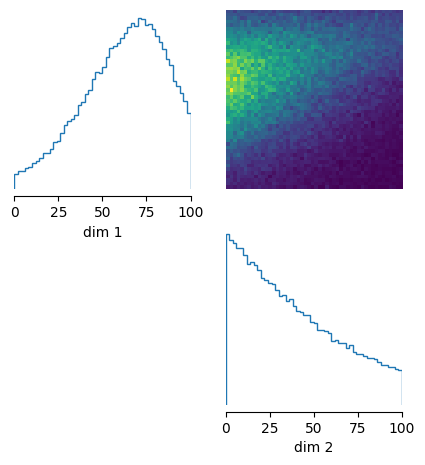

In [359]:
theta = torch.tensor([80, 70])
x_o = simulation_wrapper(theta)
print(x_o)
posterior_samples = posterior.sample((100000,), x=x_o)

# plot posterior samples
_ = analysis.pairplot(
    posterior_samples, limits=[[0, 100], [0, 100]], figsize=(5, 5)
)
predicted_tensor = simulation_wrapper(posterior_samples.median(dim=0).values)
mse = torch.mean((x_o - predicted_tensor)**2)
print(mse)